#  <strong><i>Data Upload

In [ ]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# <strong><i>EDA

### Data's summary

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###Check null data

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###Gender proportion

In [ ]:
plt1 = df.groupby(["sex"])["age"].count().to_frame()
plt1[("%")] = plt1["age"]/plt1["age"].sum()
plt1

,age,%
sex,,
female,662,0.494768
male,676,0.505232


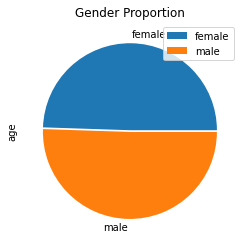

In [ ]:
plt1.plot.pie(y="age", title="Gender Proportion",explode=[0.01, 0.01])

In [ ]:
corr = df.corr()["charges"].sort_values(ascending=False).to_frame()
corr

,charges
charges,1.000000
age,0.299008
bmi,0.198341
children,0.067998


###Heat map on attributes


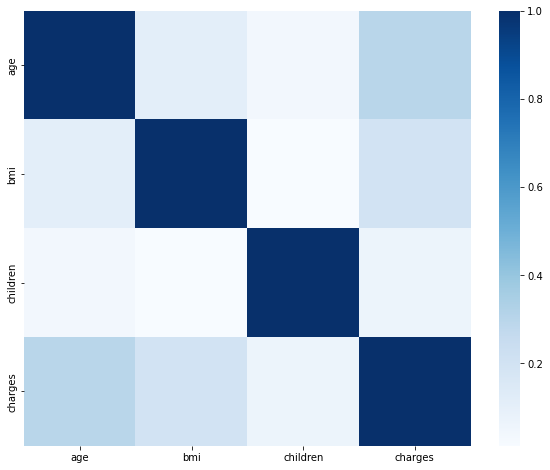

In [ ]:
plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), cmap=sns.color_palette("Blues", as_cmap=True))
#As we may expect, there is a strong relationship between smoking and charges.



```
# This is formatted as code
```

##Relation between each attributes and charges


###Relation between smoking and charges

In [ ]:
#average charges values based on smoking
df.groupby(by="smoker").charges.mean().to_frame()

,charges
smoker,
no,8434.268298
yes,32050.231832


Text(0.5, 1.0, 'Distribution of charges for non smkokers')

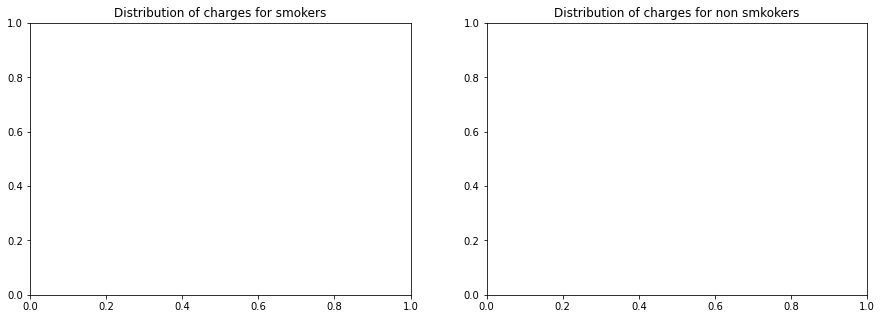

In [ ]:
#distribution of charges based on smoking
f= plt.figure(figsize=(15,5))

ax=f.add_subplot(121)
sns.histplot(df[df.smoker==1]["charges"], color="c", kde=True,  stat="density",linewidth=0, kde_kws=dict(cut=3))
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.histplot(df[df.smoker==0]["charges"], color="r", kde=True,  stat="density",linewidth=0, kde_kws=dict(cut=3))
ax.set_title('Distribution of charges for non smkokers')

###Relation between gender and charges

In [ ]:
#average charges values based on genders
df.groupby(by="sex").charges.mean().to_frame()

,charges
sex,
female,12569.578844
male,13956.751178


Text(0.5, 1.0, 'Distribution of charges for men')

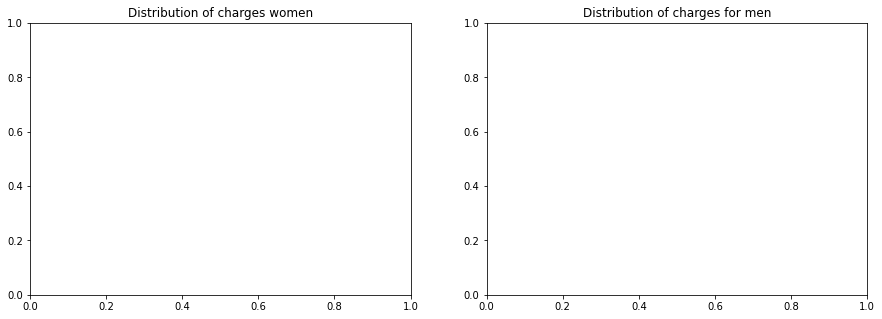

In [ ]:
#distribution of charges based on gender
f= plt.figure(figsize=(15,5))

ax=f.add_subplot(121)
sns.histplot(df[df.sex==0]["charges"], color="c", kde=True,  stat="density",linewidth=0, kde_kws=dict(cut=3))
ax.set_title('Distribution of charges women')

ax=f.add_subplot(122)
sns.histplot(df[df.sex==1]["charges"], color="r", kde=True,  stat="density",linewidth=0, kde_kws=dict(cut=3))
ax.set_title('Distribution of charges for men')

###Relation between region and charges

In [ ]:
#average charges values for regions
charges_ = df.groupby(by="region").mean().charges.to_frame().sort_values(by="charges", ascending=False)
charges_
#The highest average charges value belongs to the Southeast region which is labeled "0".

,charges
region,
southeast,14735.411438
northeast,13406.384516
northwest,12417.575374
southwest,12346.937377


###Relation between BMI and charges

<Figure size 864x360 with 0 Axes>

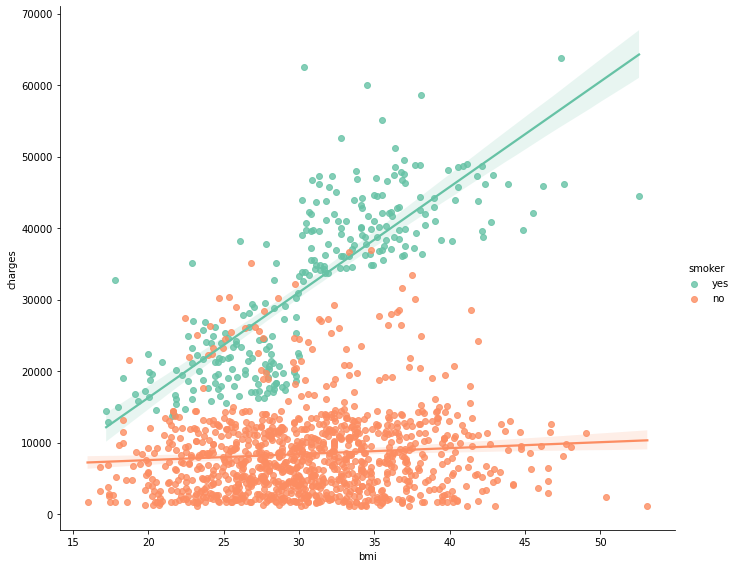

In [ ]:
#scatter plot of BMI and Charges
f= plt.figure(figsize=(12,5))
ax =sns.lmplot(x = "bmi", y = "charges", data=df, hue='smoker', palette='Set2', height=8, aspect=1.2)

# <strong><i>Data Processing

## Clean unknown data

## Encoding

### Smoker feature

In [ ]:
df['smoker'] = np.where((df.smoker == 'yes'),1,0)
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


### Sex type feature

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df['sex'] = np.where((df.sex == 'female'),1,0)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


### Region feature

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df.loc[(df.region == 'northeast'),'region']=-1
df.loc[(df.region == 'southeast'),'region']=0
df.loc[(df.region == 'northwest'),'region']=1
df.loc[(df.region == 'southwest'),'region']=2
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,-1,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,2,2007.94500


In [ ]:
df = df[  [ col for col in df.columns if col != 'charges' ] + ["charges"]]

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,-1,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,2,2007.94500


## Normalization

In [ ]:
def normaliztion(col):
  max = col.max()
  min = col.min()
  return (col - min)/(max-min)

In [ ]:
df.charges = normaliztion(df.charges)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,0.251611
1,18,0,33.770,1,0,0,0.009636
2,28,0,33.000,3,0,0,0.053115
3,33,0,22.705,0,0,1,0.333010
4,32,0,28.880,0,0,1,0.043816
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,0.151299
1334,18,1,31.920,0,0,-1,0.017305
1335,18,1,36.850,0,0,0,0.008108
1336,21,1,25.800,0,0,2,0.014144


<hr>

# <strong><i>Build Linear model

##  a. Prepare data

### Create train/test set

### Create input and label


In [ ]:
y = np.array(df['charges'])
X = np.array(df.drop(['charges'], axis = 1))

In [ ]:
y

array([0.25161076, 0.00963595, 0.05311516, ..., 0.00810808, 0.01414352,
       0.44724873])

### Train/test set split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1070, 6)

##  b. Build model

### Initialize parameter

In [ ]:
from cmath import cos
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
b_init = 785.1811367994083
w_init=np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618, 9.26425342,-11.48673753])

initial_w=np.zeros_like(w_init)
initial_b=0.
iteration =5000
alpha=5.0e-7

initial_w.shape

(6,)

### Prediction

In [ ]:
def predict(x,w,b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
    """
    p=np.dot(w,x)+b
    return p

### Compute cost with multiple variables

---



In [ ]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    for i in range(m):
        f_wb_i=np.dot(X[i],w)+b
        cost+=((f_wb_i-y[i])**2)
    cost=cost/2/m
    return cost

### Compute gradient with multiple variables

In [ ]:
def compute_gradient(X,y,w,b):
    m,n=X.shape
    dj_dw=np.zeros(n)
    dj_db=0.
    for i in range(m):
        err=np.dot(X[i],w)+b-y[i]
        for j in range(n):
            dj_dw[j]+=err*X[i,j]
        dj_db+=err
    dj_dw/=m
    dj_db/=m

    return dj_dw,dj_db

### Gradient Descent

In [ ]:
def gradient_descent(X,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
    J_history=[]
    w=copy.deepcopy(w_in)
    b=b_in
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dw,dj_db=compute_gradient(X,y,w,b)

        # Update Parameters using w, b, alpha and gradient
        w=w-alpha*dj_dw
        b=b-alpha*dj_db

        # Save cost J at each iteration
        if i<10000:
            J_history.append(cost_function(X,y,w,b))
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i%math.ceil(num_iters/10)==0:
            print(f'Iteration {i:4d}: Cost {J_history[-1]:8.6f}')

    return w,b,J_history

In [ ]:
w_final,b_final,J_hist=gradient_descent(X_train,y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,iteration)

print(f'b,w found by gradient descent: {b_final},{w_final} ')

Iteration    0: Cost 0.037369
Iteration  500: Cost 0.022165
Iteration 1000: Cost 0.018095
Iteration 1500: Cost 0.017005
Iteration 2000: Cost 0.016712
Iteration 2500: Cost 0.016633
Iteration 3000: Cost 0.016611
Iteration 3500: Cost 0.016605
Iteration 4000: Cost 0.016602
Iteration 4500: Cost 0.016600
b,w found by gradient descent: 6.756788895048485e-05,[3.17040675e-03 1.91722151e-05 2.38492693e-03 1.09537288e-04
 1.67039002e-04 7.38834199e-06] 


In [ ]:
y_predict_train=predict(X_train.T,w_final,b_final)
y_predict_test=predict(X_test.T,w_final,b_final)

print("train accuracy: {} %".format(100 - np.mean(np.abs(y_predict_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_predict_test - y_test)) * 100))

m1=X_train.shape[0]
predict(X_train[0])


train accuracy: 85.49810300965056 %
test accuracy: 85.1123459053286 %


TypeError: ignored

### Optimize learning rate(alpha)

In [ ]:
learning_rates=[9.9e-7,9e-7,5.0e-7,1e-7]
models={}
for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    w,b,models[str(lr)] = gradient_descent(X_train, y_train,initial_w,initial_b,compute_cost,compute_gradient,lr,iteration)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in range(len(learning_rates)):
    plt.plot(models[str(learning_rates[lr])], label=learning_rates[lr])

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## c. Using Linear Regression from sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
reg=LinearRegression().fit(X_train,y_train)


predicted_test = reg.predict(X_test)
predicted_train = reg.predict(X_train)
print("train accuracy: {} %".format(100 - np.mean(np.abs(predicted_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(predicted_test - y_test)) * 100))